In [1]:
import tensorflow as tf
import os
from src.utils import reload_model_from_epoch
from src.modeling.preprocess import load, resize, load_image_and_sketch
from src.preprocessing import find_sketch_threshold
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
from tensorflow.io import read_file, decode_jpeg
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [3]:
def get_example_sketches_at_thresholds(image_file, fill_space_thresholds):
    image = Image.open(image_file)
    
    sketches = []
    
    for threshold in fill_space_thresholds:
        sketches.append(find_sketch_threshold(image, fill_space_threshold = threshold))
        
    return sketches

In [7]:
def display_sketch_thresholds(image_file, fill_space_thresholds, sketches):
    fig, ax = plt.subplots(1, 5, figsize = (18, 10))

    for i in range(4):
        ax[i].imshow(sketches[i][0], cmap = 'gray');
        ax[i].set_xlabel(f'Threshold {fill_space_thresholds[i]}\n' +
                         f'Gamma: {sketches[i][1]}\n + Fill Space: {sketches[i][3]}', labelpad = 10, fontsize = 16)
        ax[i].get_xaxis().set_ticks([])
        ax[i].get_yaxis().set_ticks([])

    ax[4].imshow(Image.open(image_file), cmap = 'gray');
    ax[4].set_xlabel('Ground-Truth', labelpad = 10, fontsize = 16);
    ax[4].get_xaxis().set_ticks([]);
    ax[4].get_yaxis().set_ticks([]);
    plt.subplots_adjust(wspace = 0, hspace = 0)
    
    return

In [9]:
image_files = [
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0016.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0024.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0045.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0144.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0205.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0208.jpg'
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0227.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0243.jpg',
    '../data/raw/actual_owls/grayscale/Owl_Grayscale_0534.jpg'
]

fill_space_thresholds = [0.01, 0.03, 0.05, 0.07]
sketch_groupings = [get_example_sketches_at_thresholds(image, fill_space_thresholds) for image in image_files]

Testing gamma 0.20
White space: 0.968426, Fill space: 0.000131
Testing gamma 0.21
White space: 0.966412, Fill space: 0.000270
Testing gamma 0.22
White space: 0.964475, Fill space: 0.000656
Testing gamma 0.23
White space: 0.962577, Fill space: 0.001343
Testing gamma 0.24
White space: 0.960594, Fill space: 0.002299
Testing gamma 0.25
White space: 0.958449, Fill space: 0.003650
Testing gamma 0.26
White space: 0.956196, Fill space: 0.004815
Testing gamma 0.27
White space: 0.953804, Fill space: 0.006096
Testing gamma 0.28
White space: 0.951551, Fill space: 0.007454
Testing gamma 0.29
White space: 0.949275, Fill space: 0.008935
Testing gamma 0.30
Too much fill space, terminating.
Testing gamma 0.20
White space: 0.968426, Fill space: 0.000131
Testing gamma 0.21
White space: 0.966412, Fill space: 0.000270
Testing gamma 0.22
White space: 0.964475, Fill space: 0.000656
Testing gamma 0.23
White space: 0.962577, Fill space: 0.001343
Testing gamma 0.24
White space: 0.960594, Fill space: 0.002299
Te

White space: 0.867067, Fill space: 0.000000
Testing gamma 0.22
White space: 0.856703, Fill space: 0.000000
Testing gamma 0.23
White space: 0.849891, Fill space: 0.000000
Testing gamma 0.24
White space: 0.844754, Fill space: 0.000000
Testing gamma 0.25
White space: 0.839854, Fill space: 0.000000
Testing gamma 0.26
White space: 0.836047, Fill space: 0.000000
Testing gamma 0.27
White space: 0.832368, Fill space: 0.000000
Testing gamma 0.28
White space: 0.828570, Fill space: 0.000000
Testing gamma 0.29
White space: 0.825774, Fill space: 0.000000
Testing gamma 0.30
White space: 0.822878, Fill space: 0.000000
Testing gamma 0.31
White space: 0.819827, Fill space: 0.000000
Testing gamma 0.32
White space: 0.816821, Fill space: 0.000000
Testing gamma 0.33
White space: 0.814180, Fill space: 0.000000
Testing gamma 0.34
White space: 0.811512, Fill space: 0.000055
Testing gamma 0.35
White space: 0.808953, Fill space: 0.000182
Testing gamma 0.36
White space: 0.806503, Fill space: 0.000373
Testing gam

White space: 0.923736, Fill space: 0.010159
Testing gamma 0.50
White space: 0.919031, Fill space: 0.011189
Testing gamma 0.51
White space: 0.914771, Fill space: 0.012418
Testing gamma 0.52
White space: 0.910054, Fill space: 0.013670
Testing gamma 0.53
White space: 0.904682, Fill space: 0.014899
Testing gamma 0.54
White space: 0.899555, Fill space: 0.016643
Testing gamma 0.55
White space: 0.894113, Fill space: 0.018340
Testing gamma 0.56
White space: 0.888518, Fill space: 0.020272
Testing gamma 0.57
White space: 0.882573, Fill space: 0.022273
Testing gamma 0.58
White space: 0.876767, Fill space: 0.024157
Testing gamma 0.59
White space: 0.870728, Fill space: 0.026522
Testing gamma 0.60
White space: 0.864174, Fill space: 0.028699
Testing gamma 0.61
Too much fill space, terminating.
Testing gamma 0.20
White space: 0.993340, Fill space: 0.000023
Testing gamma 0.21
White space: 0.992509, Fill space: 0.000070
Testing gamma 0.22
White space: 0.991620, Fill space: 0.000129
Testing gamma 0.23
Wh

KeyboardInterrupt: 

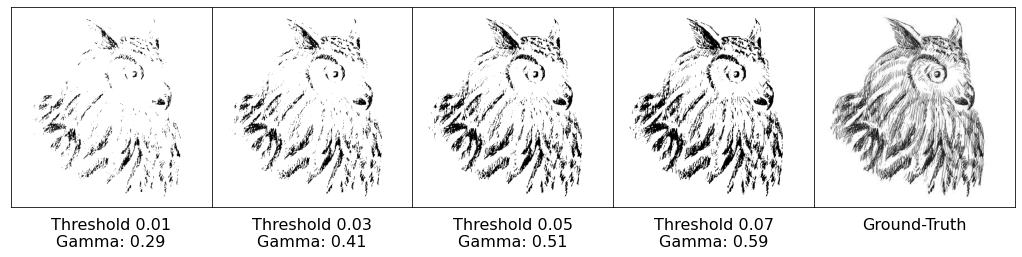

In [8]:
display_sketch_thresholds(image_file, fill_space_thresholds, sketches)